# Minggu ke-3 bulan maret

**Tujuan**:
* Melihat pengaruh frekuensi medan ($\omega_{0}$)

In [1]:
import numpy as np
from qutip import *
import matplotlib.pyplot as plt
from Hamiltonian import Hamiltonian
import matplotlib as mpl
%matplotlib inline

## Pengaruh terhadap probabilitas okupasi atom

In [2]:
# Parameter
wa = 2.0*np.pi                  # Frekuensi tansisi atom
wc_list = [0.1*wa, 0.5*wa, 1.0*wa, 1.5*wa, 2.0*wa]  # List dari frekuensi medan
N = 15                              # Jumlah rata-rata foton
g = 0.05*2.0*np.pi
use_rwa = False
tlist = np.linspace(0,30,301)

# Menghitung operator
a = tensor(destroy(N), qeye(2))  #operator a (anhilation)
sm = tensor(qeye(N), destroy(2)) #operator sigma-minus

# Keadaan awal
psi_0 = tensor(basis(N,0), basis(2,0)) # keadaan eksitasi

In [3]:
# Mendefinisikan Hamiltonian
P_a = []
for wc in wc_list:
    H = Hamiltonian(omega_a=wa, omega_m=wc, g=g, n=N, a=a, sm=sm, rwa=use_rwa)
    me_result = mesolve(H, psi_0, tlist, [], [sm.dag()*sm])
    P_a.append(me_result.expect[0])
    print(wc)

0.6283185307179586
3.141592653589793
6.283185307179586
9.42477796076938
12.566370614359172


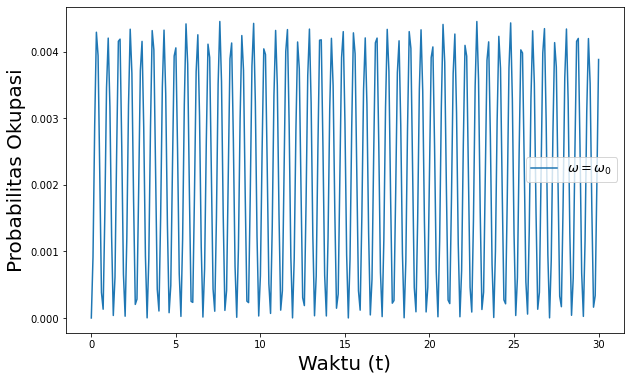

In [5]:
# plot grafik
fig, axes = plt.subplots(1, 1, figsize=(10,6))
#axes.plot(tlist, P_a[0], label=r"$\omega=0.1\omega_{0}$")
axes.plot(tlist, P_a[1], label=r"$\omega=\omega_{0}$")
#axes.plot(tlist, P_a[2], label=r"$\omega>\omega_{0}$")
axes.legend(loc=0,  fontsize=13)
axes.set_xlabel('Waktu (t)', fontsize=20)
axes.set_ylabel('Probabilitas Okupasi', fontsize=20)
plt.savefig('Plot_prob okupasi_frekuensi medan.pdf')  

## Pengaruh terhadap energi

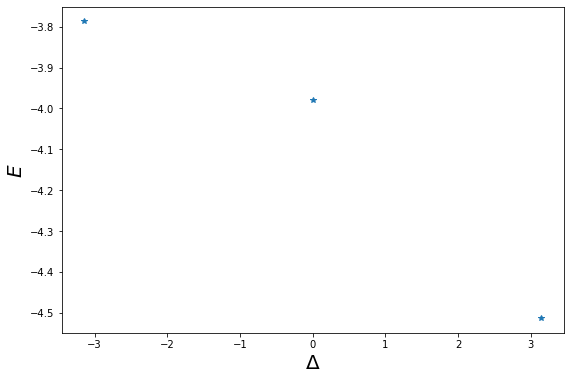

In [5]:
E_list = []
delta = []
for wc in wc_list:
    H = Hamiltonian(omega_a=wa, omega_m=wc, g=g, n=N, a=a, sm=sm, rwa=use_rwa)
    gnd_energy, gnd_state = H.groundstate() 
    E_list.append(gnd_energy)
    delta.append(wa-wc)
fig, axes = plt.subplots(1, 1, sharex=True, figsize=(9,6))
axes.plot(delta, E_list, '*')
axes.set_xlabel(r'$\Delta$', fontsize=20)
axes.set_ylabel(r'$E$', fontsize=20)
plt.savefig('Plot_energi_frekuensi medan.pdf')  

## Pengaruh terhadap fungsi wigner

In [6]:
t_idx = np.where([tlist == t for t in [0.0, 5.0, 15.0, 25.0, 30]])[1]
t_idx

array([  0,  50, 150, 250, 300])

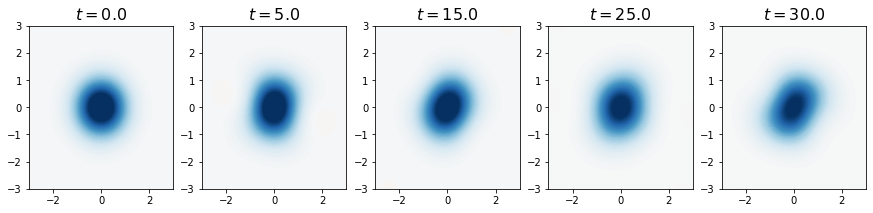

In [7]:
xvec = np.linspace(-3,3,200)
fig, axes = plt.subplots(1,len(t_idx), sharex=True, figsize=(3*len(t_idx),3))
for j, wc in  enumerate(wc_list):
    H = Hamiltonian(omega_a=wa, omega_m=wc, g=g, n=N, a=a, sm=sm, rwa=use_rwa)
    me_result = mesolve(H, psi_0, tlist, [], [])
    psi_list = me_result.states
    i = 0
    for idx, rho in enumerate(psi_list):
        if idx == t_idx[i]:
            rho_cavity = ptrace(rho, 0)
            W = wigner(rho_cavity, xvec, xvec)
            axes[i].contourf(xvec, xvec, W, 100, norm=mpl.colors.Normalize(-.25,.25), cmap=plt.get_cmap('RdBu'))
            axes[i].set_title(r"$t = %.1f$" % tlist[idx], fontsize=16)
            plt.savefig('Plot_wigner {}_frekuensi medan.pdf'.format(j))
            i += 1

## Pengaruh terhadap entropi

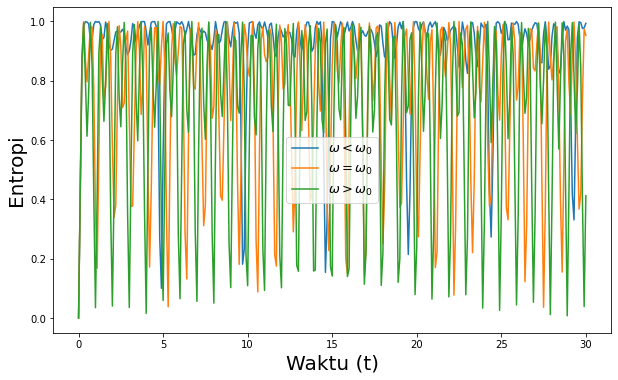

In [8]:
xvec = np.linspace(-3,3,200)

entropi_list = np.zeros([len(wc_list), len(tlist)])
for j, wc in  enumerate(wc_list):
    H = Hamiltonian(omega_a=wa, omega_m=wc, g=g, n=N, a=a, sm=sm, rwa=use_rwa)
    me_result = mesolve(H, psi_0, tlist, [], [])
    psi_list = me_result.states
    for idx, psi in enumerate(psi_list):
        rhoo = ptrace(psi, 1)
        entropi_list[j,idx] = entropy_vn(rhoo, 2)

fig, axes = plt.subplots(1, 1, figsize=(10,6))
axes.plot(tlist, entropi_list[0], label=r"$\omega<\omega_{0}$")
axes.plot(tlist, entropi_list[1], label=r"$\omega=\omega_{0}$")
axes.plot(tlist, entropi_list[2], label=r"$\omega>\omega_{0}$")
axes.legend(loc=0,  fontsize=13)
axes.set_xlabel('Waktu (t)', fontsize=20)
axes.set_ylabel('Entropi', fontsize=20)
plt.savefig('Plot_entropi_frekuensi medan.pdf')  

In [9]:
help(entropy_vn)

Help on function entropy_vn in module qutip.entropy:

entropy_vn(rho, base=2.718281828459045, sparse=False)
    Von-Neumann entropy of density matrix
    
    Parameters
    ----------
    rho : qobj
        Density matrix.
    base : {e,2}
        Base of logarithm.
    sparse : {False,True}
        Use sparse eigensolver.
    
    Returns
    -------
    entropy : float
        Von-Neumann entropy of `rho`.
    
    Examples
    --------
    >>> rho=0.5*fock_dm(2,0)+0.5*fock_dm(2,1)
    >>> entropy_vn(rho,2)
    1.0



In [10]:
help(ptrace)

Help on function ptrace in module qutip.qobj:

ptrace(Q, sel)
    Partial trace of the Qobj with selected components remaining.
    
    Parameters
    ----------
    Q : :class:`qutip.Qobj`
        Composite quantum object.
    sel : int/list
        An ``int`` or ``list`` of components to keep after partial trace.
    
    Returns
    -------
    oper : :class:`qutip.Qobj`
        Quantum object representing partial trace with selected components
        remaining.
    
    Notes
    -----
    This function is for legacy compatibility only. It is recommended to use
    the ``ptrace()`` Qobj method.



In [11]:
j = np.zeros([len(wc_list), 10])
j

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [12]:
j[0,1]=1
j

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [13]:
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])